### Transmission Trees - A terjedés modellezése

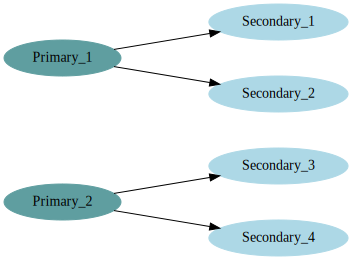

In [1]:
import graphviz

T1=graphviz.Digraph('T1', engine='neato')

T1.node('Primary_1', pos='-2,1!', color='cadetblue', style='filled')
T1.node('Primary_2', pos='-2,-1!', color='cadetblue', style='filled')
T1.node('Secondary_1', pos='1,1.5!', color='lightblue', style='filled')
T1.node('Secondary_2', pos='1,0.5!', color='lightblue', style='filled')
T1.node('Secondary_3', pos='1,-0.5!', color='lightblue', style='filled')
T1.node('Secondary_4', pos='1, -1.5!', color='lightblue', style='filled')

T1.edge('Primary_1', 'Secondary_1') #, style='dashed')
T1.edge('Primary_1', 'Secondary_2')
T1.edge('Primary_2', 'Secondary_3')
T1.edge('Primary_2', 'Secondary_4')

display(T1)

És akkor persze nézhetünk további lépcsőket: a másodlagos fertőzöttek elsődleges fertőzök lesznek. (Persze ez egy nagyon leegyszerűsített modell, mert a korábbi Primary-k is fertőzhetnek még, de ettől most eltekintünk)

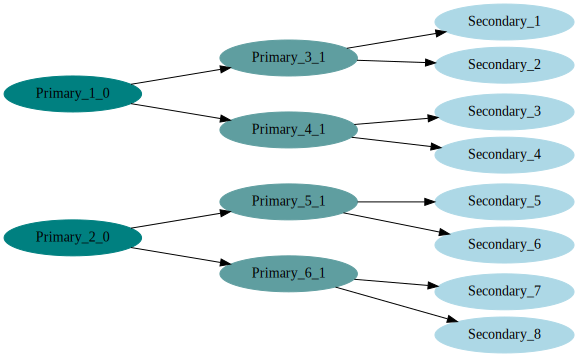

In [2]:
T2=graphviz.Digraph('T2', engine='neato')

T2.node('Primary_1_0', pos='-2,2!', color='teal', style='filled')
T2.node('Primary_2_0', pos='-2,0!', color='teal', style='filled')

T2.node('Primary_3_1', pos='1,2.5!', color='cadetblue', style='filled')
T2.node('Primary_4_1', pos='1,1.5!', color='cadetblue', style='filled')
T2.node('Primary_5_1', pos='1,0.5!', color='cadetblue', style='filled')
T2.node('Primary_6_1', pos='1, -0.5!', color='cadetblue', style='filled')

T2.node('Secondary_1', pos='4,3!', color='lightblue', style='filled')
T2.node('Secondary_2', pos='4,2.4!', color='lightblue', style='filled')
T2.node('Secondary_3', pos='4,1.75!', color='lightblue', style='filled')
T2.node('Secondary_4', pos='4,1.15!', color='lightblue', style='filled')
T2.node('Secondary_5', pos='4,0.5!', color='lightblue', style='filled')
T2.node('Secondary_6', pos='4, -0.1!', color='lightblue', style='filled')
T2.node('Secondary_7', pos='4,-0.75!', color='lightblue', style='filled')
T2.node('Secondary_8', pos='4, -1.35!', color='lightblue', style='filled')

T2.edge('Primary_1_0', 'Primary_3_1') #, style='dashed')
T2.edge('Primary_1_0', 'Primary_4_1')
T2.edge('Primary_2_0', 'Primary_5_1')
T2.edge('Primary_2_0', 'Primary_6_1')

T2.edge('Primary_3_1', 'Secondary_1')
T2.edge('Primary_3_1', 'Secondary_2')
T2.edge('Primary_4_1', 'Secondary_3')
T2.edge('Primary_4_1', 'Secondary_4')
T2.edge('Primary_5_1', 'Secondary_5')
T2.edge('Primary_5_1', 'Secondary_6')
T2.edge('Primary_6_1', 'Secondary_7')
T2.edge('Primary_6_1', 'Secondary_8')

display(T2)

**Hol jön be itt az $R_{0}$?**  
Egy ilyen 'transmission tree' rendszerint nem figyelhető meg, hacsak nem hajtanak végre szigorú kontakt nyomonkövetést mikrobiológiai vizsgálattal. Ehelyett egy valószínűségszámítás alapú rekonstrukciót csinálnak.

A másik, nem levezetett becslés, (ami $R_{a}$-t használja) átvihető diszkrét esetbe. Ez kell is, mivel az adatokat évente nézzük. Ekkor a becsült $R_{0}$ érték:

In [3]:
import sympy as sp

R_0 = sp.Symbol('R_0')
s = sp.Symbol('s')
j_t=sp.Symbol('j_t')
j_t_s=sp.Symbol('j_t-s')
g_s=sp.Symbol('g_s')

display(sp.Equality(R_0, j_t/sp.Sum(g_s*j_t_s, (s, 0, sp.oo))))
display(sp.Equality(1/R_0, sp.Sum(g_s*j_t_s, (s, 0, sp.oo))/j_t))

Eq(R_0, j_t/Sum(g_s*j_t-s, (s, 0, oo)))

Eq(1/R_0, Sum(g_s*j_t-s, (s, 0, oo))/j_t)

Ha ennek az egyenletnek vesszük a reciprokát, akkor az egyenlőség jobboldalán álló kifejezés  
--számlálója: a potenciális elsődlegesen fertőzöttek kapcsolatfelvételének száma, ami egyenlős valószínúséggel eredményez másodlagos fertőződést  
--nevezője: a másodlagos fertőzések száma  
Így ez a kifejezés a sikeres továbbfertőzés valószínűségét fejezi ki, ami így a baloldal szerint $\frac{1}{R_{0}}$


Ha figyelembe vesszük a hányados által meghatározott valószínűséget, akkor adhatunk egy várható értéket a következőleg megfertőzödöttek számára. Ekkor nem teljesen úgy fog kinézni az ábránk, mint a korábbiakban.

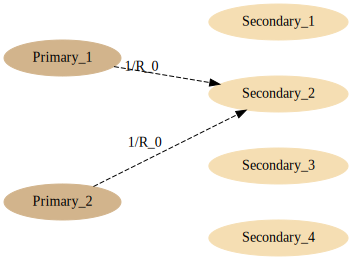

In [4]:
T3=graphviz.Digraph('T3', engine='neato')

T3.node('Primary_1', pos='-2,1!', color='tan', style='filled')
T3.node('Primary_2', pos='-2,-1!', color='tan', style='filled')
T3.node('Secondary_1', pos='1,1.5!', color='wheat', style='filled')
T3.node('Secondary_2', pos='1,0.5!', color='wheat', style='filled')
T3.node('Secondary_3', pos='1,-0.5!', color='wheat', style='filled')
T3.node('Secondary_4', pos='1, -1.5!', color='wheat', style='filled')

T3.edge('Primary_1', 'Secondary_2', style='dashed', xlabel=f'{sp.cancel(1/R_0)}')
T3.edge('Primary_2', 'Secondary_2', style='dashed', xlabel=f'{sp.cancel(1/R_0)}')

display(T3)